### Part I. Implement a decision tree algorithm and make predictions.

In [ ]:
import numpy as np

In [ ]:
class TreeNode:
    """ Node class in the decision tree. """
    def __init__(self, T):
        self.type = 'leaf' # Type of current node. Could be 'leaf' or 'branch' (at default: 'leaf').
        self.left = None   # Left branch of the tree (for leaf node, it is None).
        self.right = None  # Right branch of the tree (for leaf node, it is None).
        self.dataset = T   # Dataset of current node, which is a tuple (X, Y).
                           # X is the feature array and Y is the label vector.

    def set_as_leaf(self, common_class):
        """ Set current node as leaf node. """
        self.type = 'leaf'
        self.left = None
        self.right = None
        self.common_class = common_class

    def set_as_branch(self, left_node, right_node, split_rule):
        """ Set current node as branch node. """
        self.type = 'branch'
        self.left = left_node
        self.right = right_node
        # split_rule should be a tuple (j, t).
        #   When x_j <= t, it goes to left branch.
        #   When x_j > t, it goes to right branch.
        self.split_rule = split_rule

In [ ]:
# Prepare for dataset.
def get_dataset():
    X = np.array(
        [[1.0, 2.0],
         [2.0, 2.0],
         [3.0, 2.0],
         [2.0, 3.0],
         [1.0, 3.0]
        ])
    Y = np.array(
        [1,
         1,
         0,
         0,
         0])
    T = (X, Y) # The dataset T is a tuple of feature array X and label vector Y.
    return T

T = get_dataset()

In this part, you are required to implement the decision tree algorithm shown in the problem description of Q2 in HW4:

<img src="./decision_tree_algorithm.png" width="600" />

The **4 steps** are marked in comments of the following code. Please fill in the missing blanks (e.g. "...") in the TODOs:

In [ ]:
# Initialization.
root_node = TreeNode(T)

In [ ]:
# Procedure for current node.
def build_decision_tree_procedure(node_cur, depth=0):
    # Step 1. Check if all data points in T_cur are in the same class
    #         - If it is true, set current node as a *leaf node* to predict the common class in T_cur,
    #           and then terminate current procedure.
    #         - If it is false, continue the procedure.

    T_cur = node_cur.dataset
    X_cur, Y_cur = T_cur  # Get current feature array X_cur and label vector Y_cur.
    if (Y_cur == 1).all():
        print('    ' * depth + '+-> leaf node (predict 1).')
        print('    ' * depth + '      Gini: {:.3f}'.format(Gini(T_cur)))
        print('    ' * depth + '      samples: {}'.format(len(X_cur)))
        node_cur.set_as_leaf(1)
        return
    elif (Y_cur == 0).all():
        print('    ' * depth + '+-> leaf node (predict 0).')
        print('    ' * depth + '      Gini: {:.3f}'.format(Gini(T_cur)))
        print('    ' * depth + '      samples: {}'.format(len(X_cur)))
        node_cur.set_as_leaf(0)
        return

    # Step 2. Traverse all possible splitting rules.
    #         - We will traverse the rules over all feature dimensions j in {0, 1} and
    #           thresholds t in X_cur[:, j] (i.e. all x_j in current feature array X_cur).
    all_rules = []

    #### TODO 1 STARTS ###
    # Please traverse the rules over all feature dimensions j in {0, 1} and
    #   thresholds t in X_cur[:, j] (i.e. all x_j in current feature array X_cur),
    #   and save all rules in all_rules variable.
    # The all_rules variable should be a list of tuples such as [(0, 1.0), (0, 2.0), ... ]

    for j in range(X_cur.shape[1]):
      for t in X_cur[:, j]:
        all_rules.append((j, t))
    #### TODO 1 ENDS ###

    # print('All rules:', all_rules)   # Code for debugging.

    # Step 3. Decide the best splitting rule.
    best_rule = (_, _)
    best_weighted_sum = 1.0
    for (j, t) in all_rules:

        #### TODO 2 STARTS ###
        # For each splitting rule (j, t), we use it to split the dataset T_cur into T1 and T2.
        # Hint: You may refer to Step 4 to understand how to set inds1, X1, Y1, len_T1 and inds2, X2, Y2, len_T2.

        # - Create subset T1.
        inds1 = X_cur[:, j] <= t                 # Indices vector for those data points with x_j <= t.
        X1 = X_cur[inds1]                    # Feature array with inds1 in X_cur.
        Y1 = Y_cur[inds1]                    # Label vector with inds1 in Y_cur.
        T1 = (X1, Y1)               # Subset T1 contains feature array and label vector.
        len_T1 = len(X1)                # Size of subset T1.
        # - Create subset T2.
        inds2 = X_cur[:, j] > t                 # Indices vector for those data points with x_j > t.
        X2 = X_cur[inds2]                    # Feature array with inds2 in X_cur.
        Y2 = Y_cur[inds2]                    # Label vector with inds2 in Y_cur.
        T2 = (X2, Y2)               # Subset T2 contains feature array and label vector.
        len_T2 = len(X2)                # Size of subset T2.
        #### TODO 2 ENDS ###

        # Calculate weighted sum and try to find the best one.
        weighted_sum = (len_T1*Gini(T1) + len_T2*Gini(T2)) / (len_T1 + len_T2)
        # print('Rule:', (j, t), 'len_T1, len_T2:', len_T1, len_T2, 'weighted_sum:', weighted_sum)  # Code for debugging.
        if weighted_sum < best_weighted_sum:

            #### TODO 3 STARTS ####
            # Update the best rule and best weighted sum with current ones.

            best_rule = (j, t)
            best_weighted_sum = weighted_sum
            #### TODO 3 ENDS ####

    # Step 4. - We split the dataset T_cur into two subsets best_T1, best_T2 following
    #               the best splitting rule (best_j, best_t).
    #         - Then we set current node as a *branch* node and create child nodes with
    #               the subsets best_T1, best_T2 respectively.
    #         - For each child node, start from *Step 1* again recursively.

    best_j, best_t = best_rule
    # - Create subset best_T1 and corresponding child node.
    best_inds1 = X_cur[:,best_j] <= best_t
    best_X1 = X_cur[best_inds1]
    best_Y1 = Y_cur[best_inds1]
    best_T1 = (best_X1, best_Y1)
    node1 = TreeNode(best_T1)
    # - Create subset best_T2 and corresponding child node.
    best_inds2 = X_cur[:,best_j] > best_t
    best_X2 = X_cur[best_inds2]
    best_Y2 = Y_cur[best_inds2]
    best_T2 = (best_X2, best_Y2)
    node2 = TreeNode(best_T2)
    # - Set current node as branch node and create child nodes.
    node_cur.set_as_branch(left_node=node1, right_node=node2, split_rule=best_rule)
    print('    ' * depth + '+-> branch node')
    print('    ' * depth + '      Gini: {:.3f}'.format(Gini(T_cur)))
    print('    ' * depth + '      samples: {}'.format(len(X_cur)))
    # - For each child node, start from Step 1 again recursively.
    print('    ' * (depth + 1) + '|-> left branch: x_{} <= {} (with {} data point(s)).'.format(best_j, best_t, len(best_X1)))
    build_decision_tree_procedure(node1, depth+1) # Note: The depth is only used for logging.
    print('    ' * (depth + 1) + '|-> right branch: x_{} > {} (with {} data point(s)).'.format(best_j, best_t, len(best_X2)))
    build_decision_tree_procedure(node2, depth+1)

def Gini(Ti):
    """ Calculate the Gini index given dataset Ti. """
    Xi, Yi = Ti        # Get the feature array Xi and label vector Yi.
    if len(Yi) == 0:   # If the dataset Ti is empty, it simply returns 0.
        return 0

    #### TODO 4 STARTS ####
    # Implement the Gini index function.

    P_Y1 = np.sum(Yi == 1) / len(Yi)         # Estimate probability P(Y=1) in Yi
    P_Y0 = np.sum(Yi == 0) / len(Yi)         # Estimate probability P(Y=0) in Yi
    Gini_Ti = 1 - P_Y1**2 - P_Y0**2      # Calculate Gini index: Gini_Ti = 1 - P(Y=1)^2 - P(Y=0)^2
    #### TODO 4 ENDS ####

    return Gini_Ti

After you finish the above code blank filling, you can use the following code to build the decision tree. The following code also shows the structure of the tree.

In [ ]:
# Build the decision tree.
build_decision_tree_procedure(root_node)

# If your code is correct, you should output:
#
# +-> branch node
#       Gini: 0.480
#       samples: 5
#     |-> left branch: x_1 <= 2.0 (with 3 data point(s)).
#     +-> branch node
#           Gini: 0.444
#           samples: 3
#     .....
#
# You can also use the sklearn results to validate your decision tree
# (the threshold could be slightly different but the structure of the tree should be the same).

+-> branch node
      Gini: 0.480
      samples: 5
    |-> left branch: x_1 <= 2.0 (with 3 data point(s)).
    +-> branch node
          Gini: 0.444
          samples: 3
        |-> left branch: x_0 <= 2.0 (with 2 data point(s)).
        +-> leaf node (predict 1).
              Gini: 0.000
              samples: 2
        |-> right branch: x_0 > 2.0 (with 1 data point(s)).
        +-> leaf node (predict 0).
              Gini: 0.000
              samples: 1
    |-> right branch: x_1 > 2.0 (with 2 data point(s)).
    +-> leaf node (predict 0).
          Gini: 0.000
          samples: 2


With the obtained decision tree, you can predict the class of new feature vectors:

In [ ]:
def decision_tree_predict(node_cur, x):
    if node_cur.type == 'leaf':
        return node_cur.common_class
    else:
        j, t = node_cur.split_rule
        if x[j] <= t:
            return decision_tree_predict(node_cur.left, x)
        else:
            return decision_tree_predict(node_cur.right, x)

In [ ]:
for x in [(2,1), (3,1), (3,3)]:
    y_pred = decision_tree_predict(root_node, x)
    print('Prediction of {} is {}'.format(x, y_pred))

Prediction of (2, 1) is 1
Prediction of (3, 1) is 0
Prediction of (3, 3) is 0


### Part II. Use Scikit-learn to build the tree and make predictions.

The following code uses Scikit-learn to build the decision tree. You can use it to check if your previous implementation is correct or not.

In [ ]:
# Ref: https://scikit-learn.org/stable/modules/tree.html#tree-algorithms-id3-c4-5-c5-0-and-cart
from sklearn import tree
X, Y = T
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, Y)

The following code illustrates the obtained decision tree. It should have same structure and similar rules compared with the tree in your own implementation.

[Text(0.6, 0.8333333333333334, 'x[1] <= 2.5\ngini = 0.48\nsamples = 5\nvalue = [3, 2]'),
 Text(0.4, 0.5, 'x[0] <= 2.5\ngini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(0.2, 0.16666666666666666, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.6, 0.16666666666666666, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.8, 0.5, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]')]

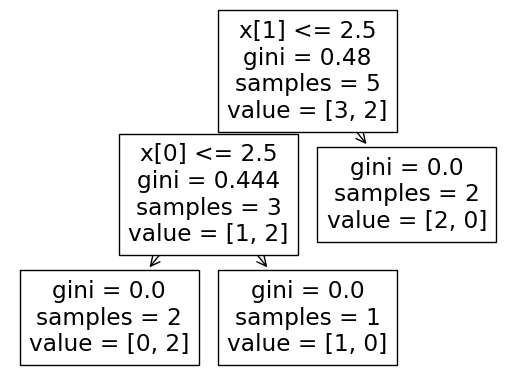

In [ ]:
# Plotting the tree.
tree.plot_tree(clf)

The following code makes the predictions using the obtained decision tree. It should have identical results as the ones for your own implementaion.

In [ ]:
# Predict the class.
for x in [(2,1), (3,1), (3,3)]:
    y_pred = clf.predict(np.array([x]))[0]
    print('Prediction of {} is {}'.format(x, y_pred))

Prediction of (2, 1) is 1
Prediction of (3, 1) is 0
Prediction of (3, 3) is 0
